In [1]:
import cv2 as cv2
import numpy as np
import imageio.v2 as imageio  # Use v2 to avoid deprecation warning
from matplotlib import pyplot as plt

In [ ]:
# Đọc ảnh
img1 = imageio.imread('C:/Users/temne/downloads//image1.jpg')
img2 = imageio.imread('C:/Users/temne/downloads//image2.jpg') 

# Chuyển về thang xám
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

<img src="image1.jpg" width="150">
<img src="image2.jpg" width="150">

In [21]:
# Phát hiện và mô tả đặc trưng SIFT
sift = cv2.SIFT_create() # Tạo một đối tượng SIFT, dùng để phát hiện và mô tả đặc trưng cục bộ của ảnh
""" 
Đầu vào: gray2 & gray2
Đầu ra:
keypoints: Danh sách các điểm đặc trưng được phát hiện trong ảnh (tọa độ, hướng, kích thước, v.v đếch bt đâu đừng hỏi :v)
descriptors: Ma trận đặc trưng mô tả vùng xung quanh mỗi điểm đặc trưng (dạng vector 128 chiều)
"""
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Ghép đặc trưng
"""
cv2.BFMatcher():
Bộ ghép đặc trưng dựa trên so sánh khoảng cách giữa các vector đặc trưng
cv2.NORM_L2: Sử dụng khoảng cách Euclidean để tính độ tương đồng giữa các vector
crossCheck=True: Chỉ chấp nhận các cặp điểm phù hợp nếu chúng phù hợp theo cả hai chiều (ảnh 1 > ảnh 2 và ảnh 2 > ảnh 1)
"""
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2) #So sánh các vector đặc trưng trong des1 với des2 để tìm các pairs
matches = sorted(matches, key=lambda x: x.distance) #Sắp xếp các cặp điểm phù hợp. Nhiều điểm dữ liệu tương đồng > khoảng cách càng 

# Lấy tọa độ các điểm đặc trưng
"""
m.queryIdx: Chỉ số của điểm đặc trưng trong ảnh 1.
m.trainIdx: Chỉ số của điểm đặc trưng trong ảnh 2.
keypoints1[m.queryIdx].pt: Lấy tọa độ điểm đặc trưng từ keypoints1.
Kết quả:
src_pts: Tọa độ các điểm đặc trưng trong ảnh 1.
dst_pts: Tọa độ tương ứng trong ảnh 2.
"""
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Tính Homography matrix
"""
cv2.findHomography(): Tính ma trận biến đổi Homography giữa hai tập điểm tương ứng (src_pts và dst_pts)
RANSAC: Thuật toán giúp lọc ra các cặp điểm phù hợp tốt nhất, loại bỏ các điểm ngoại lai (outliers)
H: Ma trận Homography 3x3, mô tả phép biến đổi giữa ảnh 1 và ảnh 2 
( tự tìm hiểu  này tôi xem trên yt )
"""
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Biến đổi và ghép ảnh
"""
cv2.warpPerspective():

Biến đổi toàn bộ ảnh img1 dựa trên ma trận Homography H.
Kích thước ảnh kết quả (width + img1.shape[1], height) được mở rộng để chứa cả hai ảnh.
"""
height, width, _ = img2.shape
result = cv2.warpPerspective(img1, H, (width + img1.shape[1], height))
result[0:height, 0:width] = img2

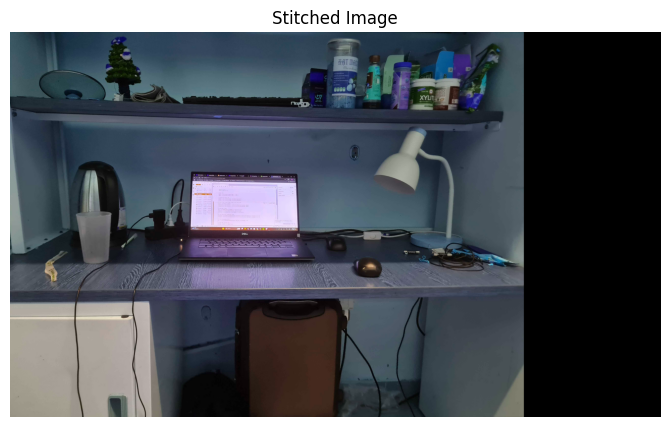

In [16]:
# Hiển thị kết quả
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Stitched Image")
plt.show()

In [ ]:
#tôi ko bt sao màu nó lại thành như này